<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/05-kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Algoritmo k-Nearest Neighbors
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                David Jaramillo &bull; 2026 - 01 - 04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de clasificación k-Nearest Neighbors (kNN) para predecir la clase de un conjunto de datos y también para predecir valores numéricos.

Los paquetes necesarios son:

In [32]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [33]:
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
print(data.head())
print(data.describe())

   #        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3    Venusaur  Grass  Poison    525  80      82       83      100      100   
3  4  Charmander   Fire     NaN    309  39      52       43       60       50   
4  5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage_1  Stage  Legendary  
0     45        1      2      False  
1     60        2      1      False  
2     80        3      0      False  
3     65        1      2      False  
4     80        2      1      False  
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  151.000000  151.00000  151.000000  151.000000  151.000000  151.000000   
mean    76.000000  407.07947   64.211921   72.549669   68.225166   67.139073   
std     43.734045   99.74384   28.590117   26

In [34]:
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]

In [35]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data[numeric_cols])
y = data['Stage']


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
k_values = range(1, 20)
precisions = []
for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    precisions.append(accuracy_score(y_test, y_pred))

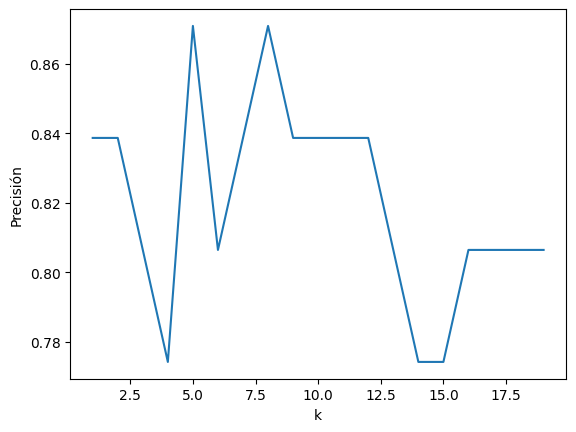

In [38]:
plt.plot(k_values, precisions)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.show()

In [39]:
mejor_k = k_values[precisions.index(max(precisions))]
print("Mejor valor de k:", mejor_k)

Mejor valor de k: 5



La gráfica muestra cómo cambia la precisión del modelo cuando variamos el valor de k. Lo que se observa es que la precisión no sigue un patrón completamente estable: sube y baja dependiendo del valor de k. Esto es normal en kNN porque el modelo es muy sensible al número de vecinos.

En este caso, el valor de k que obtuvo la mayor precisión fue k = 5, así que ese es el valor que conviene usar para entrenar el modelo final. Con valores más pequeños o más grandes, la precisión baja un poco, por lo que no serían tan buenos como k = 5.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [40]:
modelo = KNeighborsClassifier(n_neighbors=mejor_k)
modelo.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.8709677419354839


In [42]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[17  0  0]
 [ 1  9  1]
 [ 0  2  1]]


In [43]:
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.82      0.82      0.82        11
           2       0.50      0.33      0.40         3

    accuracy                           0.87        31
   macro avg       0.75      0.72      0.73        31
weighted avg       0.86      0.87      0.86        31



---
## <font color='264CC7'> Regresión </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase aterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [44]:
data = pd.read_csv('https://raw.githubusercontent.com/andres-merino/AprendizajeAutomaticoInicial-05-N0105/refs/heads/main/2-Notebooks/datos/Pokemon.csv')
print(data.head())
print(data.describe())

   #        Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3    Venusaur  Grass  Poison    525  80      82       83      100      100   
3  4  Charmander   Fire     NaN    309  39      52       43       60       50   
4  5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage_1  Stage  Legendary  
0     45        1      2      False  
1     60        2      1      False  
2     80        3      0      False  
3     65        1      2      False  
4     80        2      1      False  
                #      Total          HP      Attack     Defense     Sp. Atk  \
count  151.000000  151.00000  151.000000  151.000000  151.000000  151.000000   
mean    76.000000  407.07947   64.211921   72.549669   68.225166   67.139073   
std     43.734045   99.74384   28.590117   26

In [45]:
numeric_cols = ['Attack', 'Defense', 'Speed', 'Sp. Atk', 'Sp. Def', 'HP']
class_col = ['Stage']
data = data[['Name', *numeric_cols, *class_col]]

In [46]:
# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(data[numeric_cols])
y = data['Stage']


### <font color='264CC7'> Determinación del valor de k </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el número óptimo de k para el algoritmo kNN:
<ul>
  <li>Genera una gráfica que muestre el valor de k vs la precisión del modelo.</li>
  <li>Selecciona el valor de k que maximice la precisión.</li>
</ul>
</div>


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
k_values = range(1, 20)
precisions = []

In [53]:
for k in k_values:
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    precisions.append(accuracy_score(y_test, y_pred))

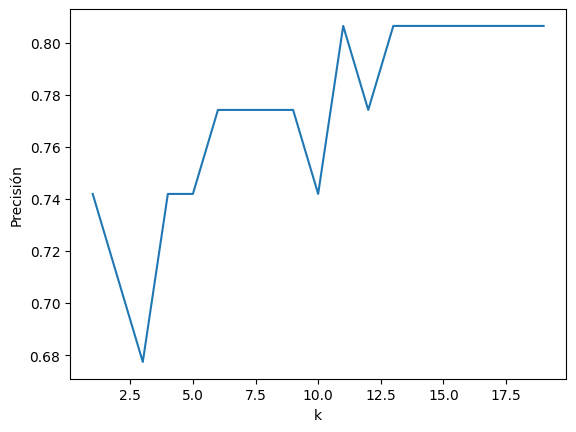

In [54]:
plt.plot(k_values, precisions)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.show()

In [55]:
mejor_k = k_values[precisions.index(max(precisions))]
print("Mejor valor de k:", mejor_k)

Mejor valor de k: 11


En el gráfico se ve que la precisión cambia bastante cuando k es pequeño, pero empieza a mejorar conforme k aumenta. El punto donde la precisión llega a su valor más alto es en k = 11, por eso ese es el mejor valor. A partir de ese punto la precisión se mantiene relativamente estable, pero no supera lo que se obtiene con k = 11.
Esto indica que el modelo obtiene su mejor equilibrio entre ruido y suavizado usando 11 vecinos, y por eso es el k más adecuado para este conjunto de datos.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el valor de k seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Calcula el error cuadrático medio.</li>
</ul>
</div>

In [56]:
modelo = KNeighborsRegressor(n_neighbors=mejor_k)
modelo.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [59]:
y_pred = modelo.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.16875499866702212


El modelo obtuvo un MSE de 0.1687, lo cual indica que, en promedio, el error cuadrático entre los valores reales y los valores predichos es relativamente pequeño. Esto significa que el modelo logra aproximar bien la variable que estamos tratando de predecir, aunque todavía existe una diferencia ligera entre lo real y lo estimado. En general, es un resultado aceptable para un modelo kNN en regresión.